In [1]:
from glob import glob
import cv2
import os
import gc
import sys
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import path

GAUSSIAN_BLUR_TOPOGRAPHIC_MAP = False
sys.path.append('/kaggle/working/')
from flattening import *

In [3]:
#train            
input_dir="/kaggle/input/vesuvius-challenge-ink-detection/train/"
dataset_dir = f"/kaggle/working/dataset_train/"
# dataset_preprocess_nonflatten(f"{input_dir}/1", dataset_dir, 1, 29, 34, train=True, delete=False)
# dataset_preprocess_nonflatten(f"{input_dir}/2", dataset_dir, 3, 29, 34, train=True, delete=False)
# dataset_preprocess_nonflatten(f"{input_dir}/3", dataset_dir, 1, 29, 34, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/1", dataset_dir, 1, 3, 8, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/2", dataset_dir, 1, 3, 8, train=True, delete=False)
dataset_preprocess_flatten(f"{input_dir}/3", dataset_dir, 1, 3, 8, train=True, delete=False)


/kaggle/input/vesuvius-challenge-ink-detection/train//1
/kaggle/input/vesuvius-challenge-ink-detection/train//2
/kaggle/input/vesuvius-challenge-ink-detection/train//3


In [3]:
#inference
input_dirs="/kaggle/input/vesuvius-challenge-ink-detection/test/"
dataset_dir = f"/kaggle/working/dataset_inference/"
split=1
delete=False

for input_dir in glob(f"{input_dirs}/*"):
    dataset_preprocess_nonflatten(f"{input_dir}", dataset_dir, split, 29, 34, train=False, delete=delete)
    # dataset_preprocess_flatten(f"{input_dir}", dataset_dir, split, 3, 8, train=False, delete=delete)


/kaggle/input/vesuvius-challenge-ink-detection/test/a
/kaggle/input/vesuvius-challenge-ink-detection/test/b


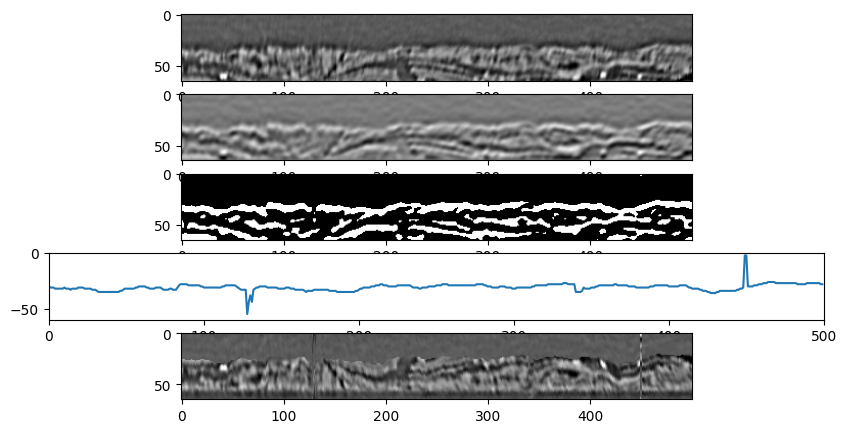

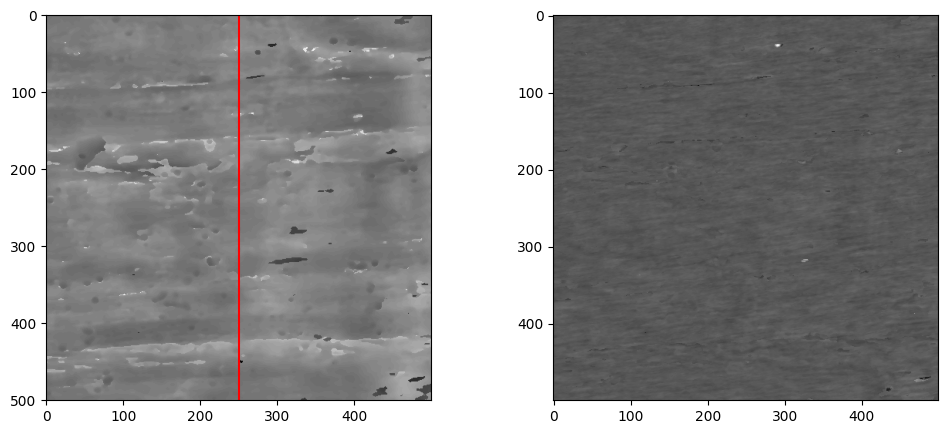

In [4]:
image_stack=np.load(open("/kaggle/working/dataset_train/image_stack_1_0.npy", "rb"))
clipped_stack, gauss_stack, filtered_stack, topographic_map, flatten_stack = flatten(image_stack, 2500, 1500, 500, 5)

slice_at = 250

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
ax1.imshow(clipped_stack[:, :, slice_at], cmap='gray')
ax2.imshow(gauss_stack[:, :, slice_at], cmap='gray')
ax3.imshow(filtered_stack[:, :, slice_at], cmap='gray')
ax4.plot(topographic_map[:, slice_at]*-1)
ax4.set_xlim(0, clipped_stack.shape[1])
ax4.set_ylim(-60, 0)
ax5.imshow(flatten_stack[:, :, slice_at], cmap='gray')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(topographic_map, cmap='gray')
ax1.plot([slice_at, slice_at], [0, topographic_map.shape[0]], color='red')
ax1.set_ylim(topographic_map.shape[0], 0)
ax2.imshow(flatten_stack[10, :, :], cmap='gray')


(65, 8181, 6330)


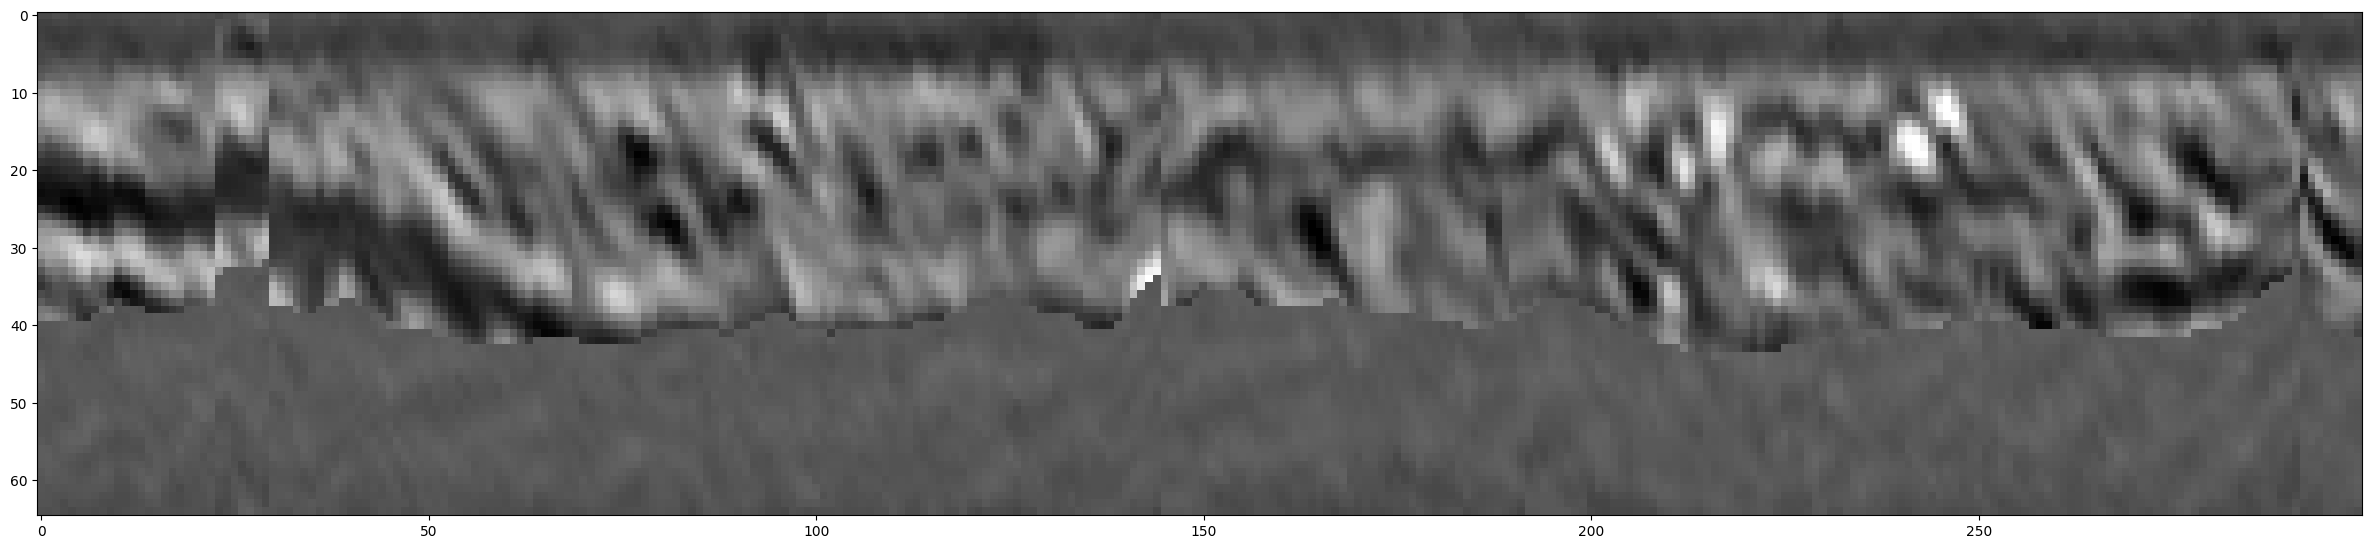

In [11]:
slice_ = slice(1700, 2000)
slice_at = 2000
with open(f"/kaggle/working/dataset_train/flatten/flatten_stack_1_0.npy", 'rb') as f:
    flatten_stack = np.load(f)
print(flatten_stack.shape)

plt.figure(figsize=(30, 30))
plt.imshow(np.flip(flatten_stack[:, slice_, slice_at],axis=0), cmap='gray')
plt.show()

(6, 300)


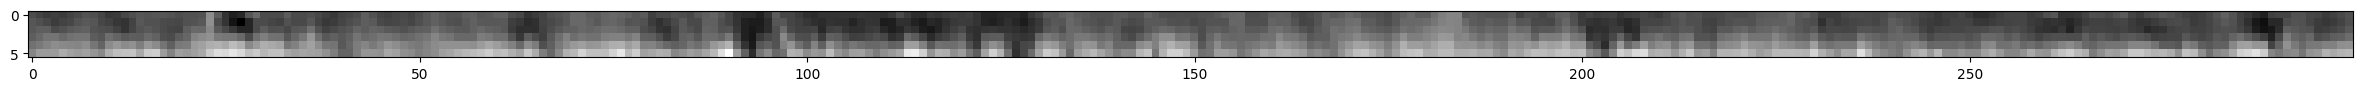

In [19]:
print(flatten_stack[-9:-3, slice_, slice_at].shape)
plt.figure(figsize=(30, 30))
plt.imshow(np.flip(flatten_stack[-9:-3, slice_, slice_at],axis=0), cmap='gray')
plt.show()

(6, 300)


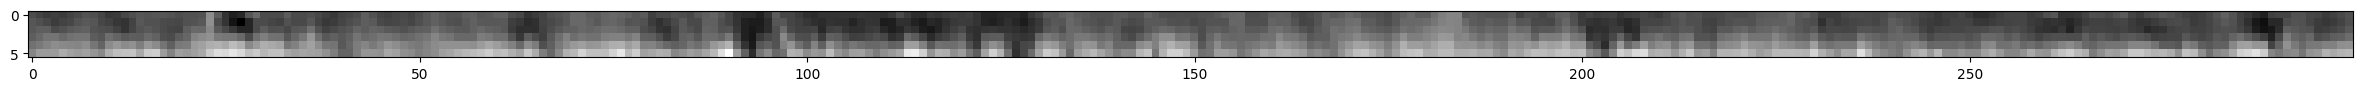

In [18]:
slice_ = slice(1700, 2000)
slice_at = 2000
with open(f"/kaggle/working/dataset_train/flatten/3-8/1_0.npy", 'rb') as f:
    image_stack = np.load(f)
print(image_stack[:, slice_, slice_at].shape)
plt.figure(figsize=(30, 30))
plt.imshow(np.flip(image_stack[:, slice_, slice_at],axis=0), cmap='gray')
plt.show()